

- Design LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, use dense layer on top (connected to the
output of the LSTM).
- Important Notes:
  - Image Size: $28\times28$
  - Using $80\%$ of the provided training data for training and $20\%$ for validation.
  - Using $32, 48, 96, 256$ units in the LSTM layer and $15\%$ dropout.
  - Using Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.




## `+` Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense , Dropout , ConvLSTM1D , Reshape , BatchNormalization , GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# `+` Seed Value

In [5]:
SEED = 907

## `+` Load & Preprocess MNIST Dataset

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


## `+` Preview Some Images 

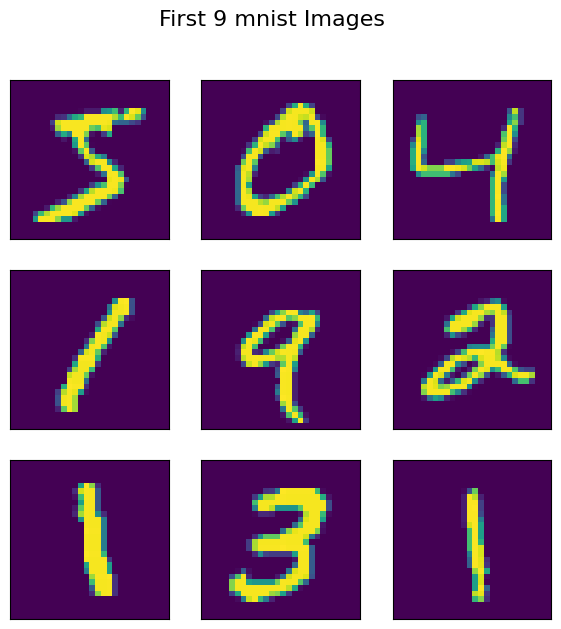

In [4]:
plt.figure(figsize=(7, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
plt.suptitle('First 9 mnist Images', fontsize=16)
plt.show()

## `+` Rescaling the inputs

In [7]:
X_train = (X_train / 255.)
X_test = (X_test / 255.)

## `+` One-hot encode the labels

In [8]:
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

## `+` Set Global Parameters

In [9]:
BATCH_SIZE  = 64
EPOCHS      = 20

## `i` Model Design

### LSTM - `32 units`

In [12]:
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(LSTM(32 , recurrent_dropout=0.15))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                7808      
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 8,138
Trainable params: 8,138
Non-trainable params: 0
_________________________________________________________________


## `ii` Model Compilation & Training

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 33s 43ms/step - loss: 0.9444 - accuracy: 0.6996 - val_loss: 0.3976 - val_accuracy: 0.8864
Epoch 2/30
750/750 [==============================] - 32s 43ms/step - loss: 0.3515 - accuracy: 0.8963 - val_loss: 0.2231 - val_accuracy: 0.9363
Epoch 3/30
750/750 [==============================] - 32s 43ms/step - loss: 0.2474 - accuracy: 0.9272 - val_loss: 0.1632 - val_accuracy: 0.9516
Epoch 4/30
750/750 [==============================] - 55s 74ms/step - loss: 0.2000 - accuracy: 0.9407 - val_loss: 0.1472 - val_accuracy: 0.9567
Epoch 5/30
750/750 [==============================] - 66s 88ms/step - loss: 0.1704 - accuracy: 0.9494 - val_loss: 0.1176 - val_accuracy: 0.9656
Epoch 6/30
750/750 [==============================] - 31s 41ms/step - loss: 0.1478 - accuracy: 0.9561 - val_loss: 0.1078 - val_accuracy: 0.9676
Epoch 7/30
750/750 [==============================] - 31s 41ms/step - loss: 0.1332 - accuracy: 0.9606 - val_loss: 0.1161 - val_accuracy:

## `iii` Model Evaluation

In [15]:
train_loss , train_accuracy = model.evaluate(X_train, y_train)
test_loss , test_accuracy = model.evaluate(X_test, y_test)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 4s 12ms/step - loss: 0.0546 - accuracy: 0.9853
Train accuracy: 0.9902
Test accuracy: 0.9853


## `iv` Result Visualization

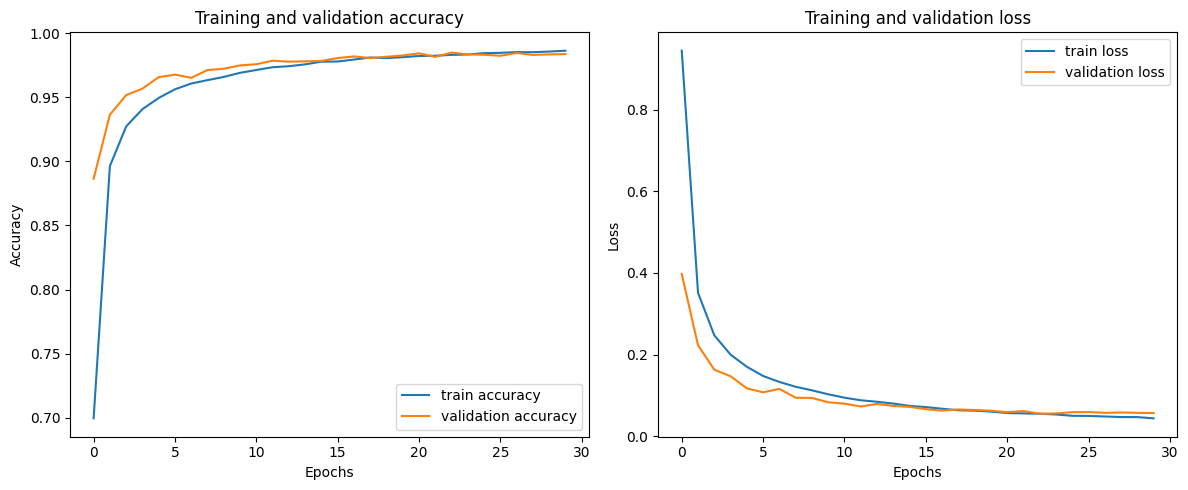

In [16]:
# Plot the training and validation accuracy and loss
fig , ax = plt.subplots(1,2 , figsize=(12,5))
ax[0].plot(history.history['accuracy'], label='train accuracy')
ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='train loss')
ax[1].plot(history.history['val_loss'], label='validation loss')
ax[1].set_title('Training and validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.tight_layout()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

313/313 [==============================] - 4s 12ms/step


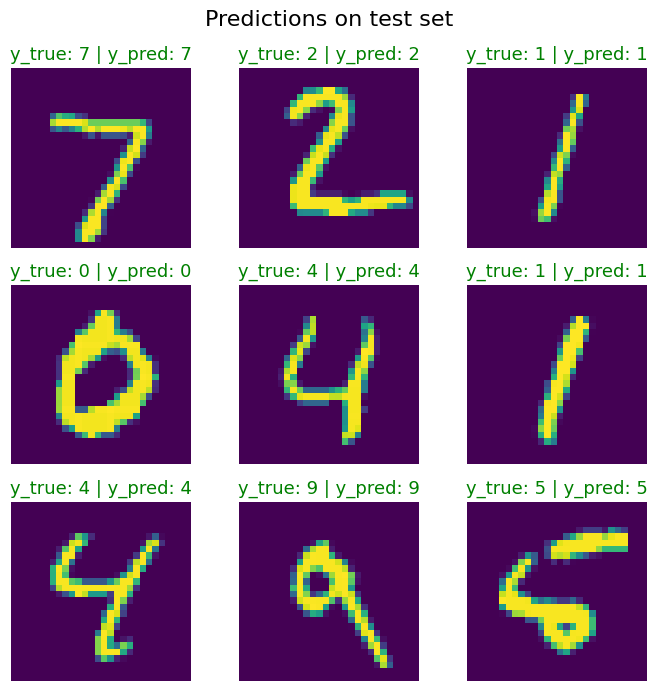

In [17]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
num_images = 9
plt.figure(figsize=(7, 7))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    color = 'green' if y_true[i] == y_pred_classes[i] else 'red'
    plt.title('y_true: {} | y_pred: {}'.format(y_true[i], y_pred_classes[i]), fontsize=13 , color=color)
plt.suptitle('Predictions on test set', fontsize=16)


plt.tight_layout()
plt.show()


### LSTM - `48 units`

In [35]:
model2 = Sequential()
model2.add(Input(shape=(28, 28)))
model2.add(LSTM(48, return_sequences=True))
model2.add(Dropout(0.15))
model2.add(LSTM(48))
model2.add(Dense(10, activation='softmax'))
model2.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 28, 48)            14784     
                                                                 
 dropout_2 (Dropout)         (None, 28, 48)            0         
                                                                 
 lstm_11 (LSTM)              (None, 48)                18624     
                                                                 
 dense_6 (Dense)             (None, 10)                490       
                                                                 
Total params: 33,898
Trainable params: 33,898
Non-trainable params: 0
_________________________________________________________________


In [36]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_48 = model2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 9s 9ms/step - loss: 0.5896 - accuracy: 0.8098 - val_loss: 0.2037 - val_accuracy: 0.9414
Epoch 2/30
750/750 [==============================] - 6s 9ms/step - loss: 0.1782 - accuracy: 0.9470 - val_loss: 0.1230 - val_accuracy: 0.9639
Epoch 3/30
750/750 [==============================] - 7s 9ms/step - loss: 0.1206 - accuracy: 0.9639 - val_loss: 0.0996 - val_accuracy: 0.9695
Epoch 4/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0935 - accuracy: 0.9722 - val_loss: 0.0899 - val_accuracy: 0.9720
Epoch 5/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0758 - accuracy: 0.9767 - val_loss: 0.0751 - val_accuracy: 0.9779
Epoch 6/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0655 - accuracy: 0.9801 - val_loss: 0.0653 - val_accuracy: 0.9810
Epoch 7/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.0648 - val_accuracy: 0.9812
Epoch

In [37]:
train_loss_48 , train_accuracy_48 = model2.evaluate(X_train, y_train)
test_loss_48 , test_accuracy_48 = model2.evaluate(X_test, y_test)
print(f"Train accuracy using 48 units: {train_accuracy_48:.4f}")
print(f"Test accuracy using 48 units: {test_accuracy_48:.4f}")

313/313 [==============================] - 1s 5ms/step - loss: 0.0507 - accuracy: 0.9872
Train accuracy using 48 units: 0.9955
Test accuracy using 48 units: 0.9872


### LSTM - `96 units`

In [38]:
model4 = Sequential()
model4.add(Input(shape=(28, 28)))
model4.add(LSTM(96, return_sequences=True))
model4.add(Dropout(0.15))
model4.add(LSTM(96))
model4.add(Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 28, 96)            48000     
                                                                 
 dropout_3 (Dropout)         (None, 28, 96)            0         
                                                                 
 lstm_13 (LSTM)              (None, 96)                74112     
                                                                 
 dense_7 (Dense)             (None, 10)                970       
                                                                 
Total params: 123,082
Trainable params: 123,082
Non-trainable params: 0
_________________________________________________________________


In [39]:
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_96 = model4.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 10s 11ms/step - loss: 0.4649 - accuracy: 0.8481 - val_loss: 0.1731 - val_accuracy: 0.9452
Epoch 2/30
750/750 [==============================] - 8s 11ms/step - loss: 0.1293 - accuracy: 0.9607 - val_loss: 0.1002 - val_accuracy: 0.9717
Epoch 3/30
750/750 [==============================] - 8s 11ms/step - loss: 0.0876 - accuracy: 0.9739 - val_loss: 0.0833 - val_accuracy: 0.9748
Epoch 4/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0740 - val_accuracy: 0.9770
Epoch 5/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0535 - accuracy: 0.9838 - val_loss: 0.0597 - val_accuracy: 0.9822
Epoch 6/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0617 - val_accuracy: 0.9806
Epoch 7/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0636 - val_accuracy: 0.981

In [40]:
train_loss_96 , train_accuracy_96 = model4.evaluate(X_train, y_train)
test_loss_96 , test_accuracy_96 = model4.evaluate(X_test, y_test)
print(f"Train accuracy using 96 units: {train_accuracy_96:.4f}")
print(f"Test accuracy using 96 units: {test_accuracy_96:.4f}")

313/313 [==============================] - 1s 5ms/step - loss: 0.0446 - accuracy: 0.9903
Train accuracy using 96 units: 0.9975
Test accuracy using 96 units: 0.9903


### LSTM - `256 units`

In [30]:
model3 = Sequential()
model3.add(Input(shape=(28, 28)))
model3.add(LSTM(256, return_sequences=True))
model3.add(Dropout(0.15))
model3.add(LSTM(256))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 28, 256)           291840    
                                                                 
 dropout_1 (Dropout)         (None, 28, 256)           0         
                                                                 
 lstm_9 (LSTM)               (None, 256)               525312    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________


In [31]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_256 = model3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 13s 13ms/step - loss: 0.3568 - accuracy: 0.8832 - val_loss: 0.1962 - val_accuracy: 0.9423
Epoch 2/30
750/750 [==============================] - 9s 12ms/step - loss: 0.0992 - accuracy: 0.9701 - val_loss: 0.0807 - val_accuracy: 0.9749
Epoch 3/30
750/750 [==============================] - 9s 12ms/step - loss: 0.0686 - accuracy: 0.9789 - val_loss: 0.0786 - val_accuracy: 0.9766
Epoch 4/30
750/750 [==============================] - 9s 12ms/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0646 - val_accuracy: 0.9800
Epoch 5/30
750/750 [==============================] - 9s 12ms/step - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.0552 - val_accuracy: 0.9835
Epoch 6/30
750/750 [==============================] - 9s 12ms/step - loss: 0.0362 - accuracy: 0.9892 - val_loss: 0.0422 - val_accuracy: 0.9872
Epoch 7/30
750/750 [==============================] - 9s 12ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0496 - val_accuracy: 0.985

In [34]:
train_loss_256 , train_accuracy_256 = model3.evaluate(X_train, y_train)
test_loss_256 , test_accuracy_256 = model3.evaluate(X_test, y_test)
print(f"Train accuracy using 256 unit: {train_accuracy_256:.4f}")
print(f"Test accuracy using 256 unit: {test_accuracy_256:.4f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0569 - accuracy: 0.9870
Train accuracy using 256 unit: 0.9930
Test accuracy using 256 unit: 0.9870


## Plotting all the LSTM models with different units to check the `Accuracy curve`

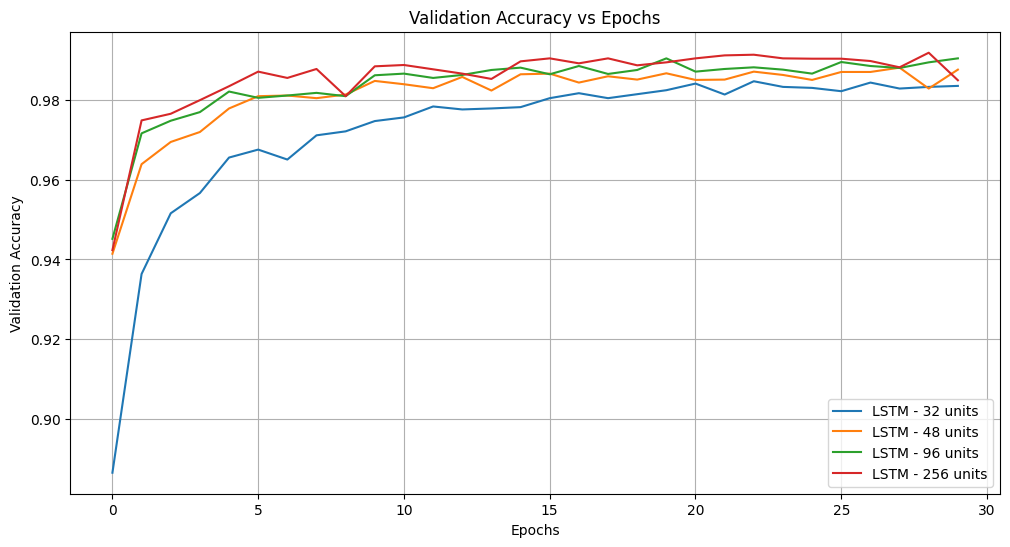

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='LSTM - 32 units')
plt.plot(history_48.history['val_accuracy'], label='LSTM - 48 units')
plt.plot(history_96.history['val_accuracy'], label='LSTM - 96 units')
plt.plot(history_256.history['val_accuracy'], label='LSTM - 256 units')
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


------------------------------

## Using `ConvLSTM1D` layer instead of `LSTM`: An LSTM utilizing the power of convolutions.

------------------------------

## Reshaping the inputs to fit with CONVLSTM

In [10]:

x_train = X_train.reshape((-1, 28, 28, 1))
x_test = X_test.reshape((-1, 28, 28, 1))

## Model Design

In [13]:
model5 = Sequential()
model5.add(Input(shape=(28,28,1)))
model5.add(ConvLSTM1D(filters=32, kernel_size=3, padding='same'))
model5.add(GlobalAveragePooling1D())
model5.add(Dense(10, activation='softmax'))
model5.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d_2 (ConvLSTM1D)  (None, 28, 32)            12800     
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


## Model Compilation & Training

In [14]:
model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_ConvLSTM = model5.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 58s 75ms/step - loss: 1.2879 - accuracy: 0.5856 - val_loss: 0.7595 - val_accuracy: 0.7782
Epoch 2/20
750/750 [==============================] - 57s 76ms/step - loss: 0.6169 - accuracy: 0.8094 - val_loss: 0.4850 - val_accuracy: 0.8560
Epoch 3/20
750/750 [==============================] - 56s 75ms/step - loss: 0.4085 - accuracy: 0.8801 - val_loss: 0.3223 - val_accuracy: 0.9105
Epoch 4/20
750/750 [==============================] - 56s 75ms/step - loss: 0.3000 - accuracy: 0.9140 - val_loss: 0.2398 - val_accuracy: 0.9329
Epoch 5/20
750/750 [==============================] - 57s 75ms/step - loss: 0.2335 - accuracy: 0.9332 - val_loss: 0.2118 - val_accuracy: 0.9397
Epoch 6/20
750/750 [==============================] - 55s 74ms/step - loss: 0.1998 - accuracy: 0.9421 - val_loss: 0.1812 - val_accuracy: 0.9478
Epoch 7/20
750/750 [==============================] - 56s 74ms/step - loss: 0.1691 - accuracy: 0.9512 - val_loss: 0.1482 - val_accuracy:

## Evaluation

In [15]:
train_loss_ConvLSTM , train_accuracy_ConvLSTM = model5.evaluate(x_train, y_train)
test_loss_ConvLSTM , test_accuracy_ConvLSTM = model5.evaluate(x_test, y_test)
print(f"Train accuracy using ConvLSTM: {train_accuracy_ConvLSTM:.4f}")
print(f"Test accuracy using ConvLSTM: {test_accuracy_ConvLSTM:.4f}")

313/313 [==============================] - 7s 23ms/step - loss: 0.0892 - accuracy: 0.9732
Train accuracy using ConvLSTM: 0.9775
Test accuracy using ConvLSTM: 0.9732


## Result Visualization

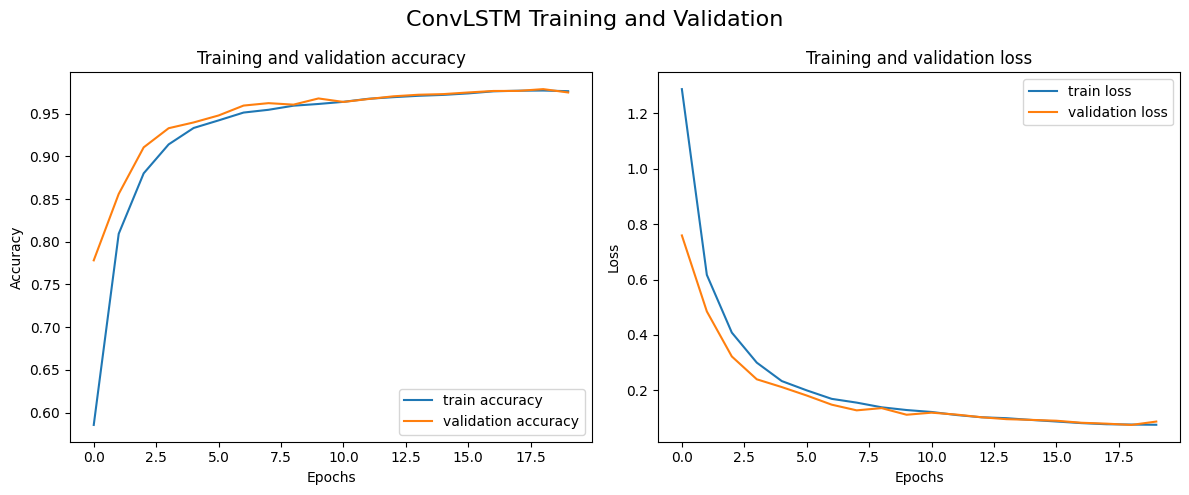

In [22]:
fig , ax = plt.subplots(1,2 , figsize=(12,5))
ax[0].plot(history_ConvLSTM.history['accuracy'], label='train accuracy')
ax[0].plot(history_ConvLSTM.history['val_accuracy'], label='validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history_ConvLSTM.history['loss'], label='train loss')
ax[1].plot(history_ConvLSTM.history['val_loss'], label='validation loss')
ax[1].set_title('Training and validation loss')
ax[1].set_xlabel('Epochs')  
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.suptitle('ConvLSTM Training and Validation', fontsize=16)
plt.tight_layout()

plt.show()

## Let's Visualize Model Predictions

313/313 [==============================] - 8s 25ms/step


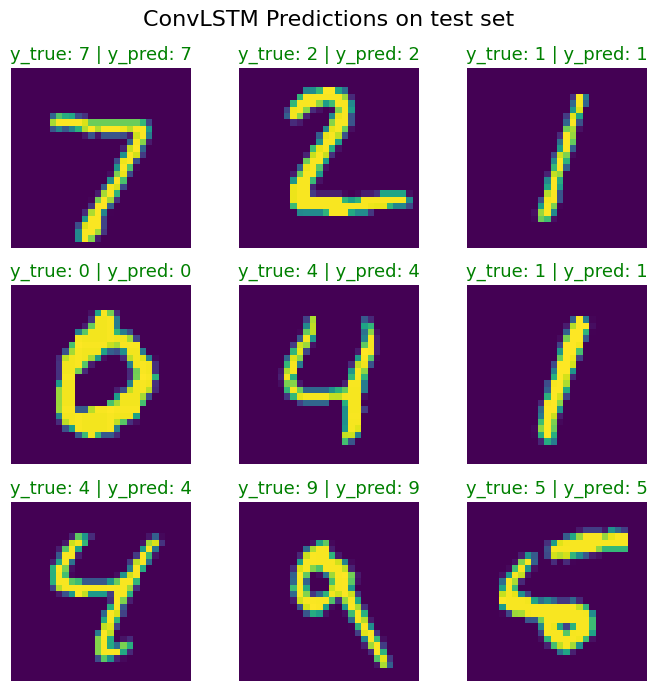

In [23]:
y_pred_probs_ConvLSTM = model5.predict(x_test)
y_pred_classes_ConvLSTM = np.argmax(y_pred_probs_ConvLSTM, axis=1)
y_true_ConvLSTM = np.argmax(y_test, axis=1)
num_images = 9

plt.figure(figsize=(7, 7))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    color = 'green' if y_true_ConvLSTM[i] == y_pred_classes_ConvLSTM[i] else 'red'
    plt.title('y_true: {} | y_pred: {}'.format(y_true_ConvLSTM[i], y_pred_classes_ConvLSTM[i]), fontsize=13 , color=color)

plt.suptitle('ConvLSTM Predictions on test set', fontsize=16)
plt.tight_layout()
plt.show()

----------------------------------------------
